### 1. Bacteria grow with constant number of population

$$N = N_0 + pt$$

$N$ means the number of total population, 

$N_0$ means the number of initial population, 

$t$ means the number of time period (the unit can be hour, day or week), 

and $p$ means the increased number of population for each time period, a constant.

Let $N_0 = 100$, $p = 20$, we can get a linear equation $N = 100 + 20t$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.linspace(0, 99, 100)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

Text(0, 0.5, 'N')

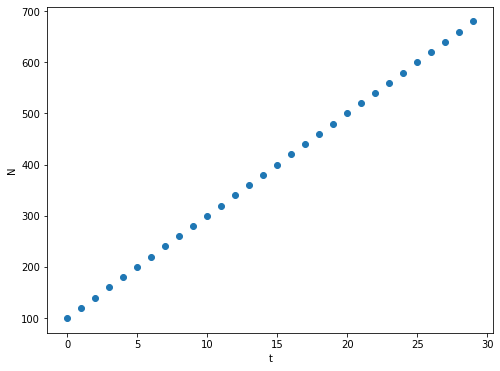

In [3]:
t = np.linspace(0, 29, 30)
p = 20
N = 100 + p * t
plt.figure(figsize=(8, 6))
plt.scatter(t, N)
plt.xlabel('t')
plt.ylabel('N')
# plt.close()

#### The derivate of N to t
$$\frac{d_N}{d_t}=p$$

Text(0, 0.5, 'p')

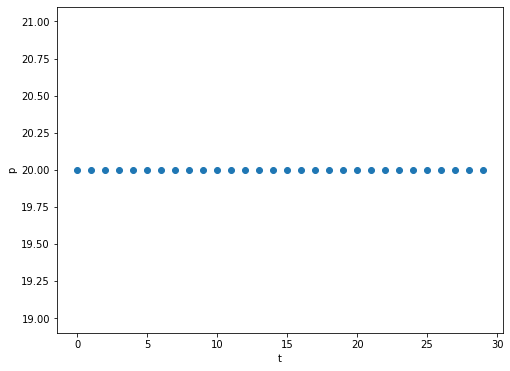

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(t, [p] * len(t))
plt.xlabel('t')
plt.ylabel('p')
# plt.close()

### 2. Bacteria grow with a constant ratio of total population

$$\frac{d_N}{d_t} = rN$$

$N$ means the number of total population, a function of $t$, 

<!-- $N_0$ means the number of initial population,  -->

$t$ means the number of time period (the unit can be hour, day or week), 

and $r$ means the growth rate of population for each time period, a constant.

<!-- Let $N_0 = 100$, $p = 20$, we can get a linear equation $N = 100 + 20t$. -->

Solve the **differential equation**, we can get 
$$N = C \times e^{rt}$$
Let $C = N_0 = 100, r = 0.04$, we can get $N = 100e^{0.04t}$.

Text(0, 0.5, 'N')

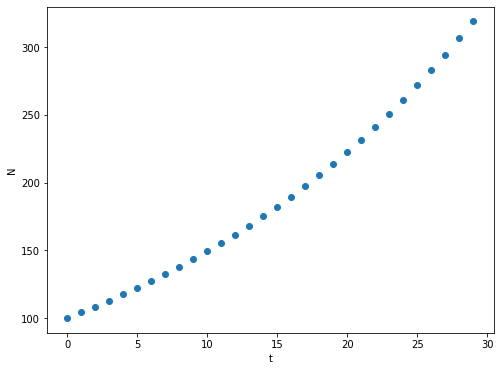

In [5]:
N0 = 100
r = 0.04
N = N0 * np.power(np.e, r * t)
plt.figure(figsize=(8, 6))
plt.scatter(t, N)
plt.xlabel('t')
plt.ylabel('N')

Text(0, 0.5, 'p2')

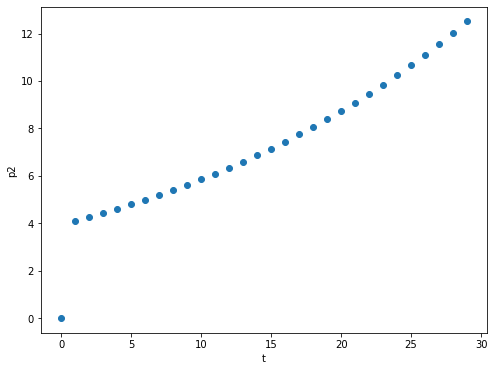

In [6]:
p2 = [N[i+1] - N[i] for i in range(len(N)-1)]
p2 = np.array([0] + p2)

plt.figure(figsize=(8, 6))
plt.scatter(t, p2)
plt.xlabel('t')
plt.ylabel('p2')

### 3. Growth with limited resource
The growth can't go on forever as they will soon run out of available food/resource.
- Let $k$ represent the maximum population that the food/resource can support

The differential equation (**The Verhulst Equation**) can be:
$$\frac{d_{N}}{d_t} = rN(1 - \frac{N}{k}) = \frac{rN(k-N)}{k}$$
> where $r$ is the Malthusian parameter (马尔萨斯常数, rate of maximum population growth) and $k$ is the so-called carrying capacity (i.e., the maximum sustainable population). 

Solve the differential equation, we can get:
$$N = \frac{k}{1 + (\frac{k}{N_0} - 1) e^{-rt}}$$

Let $N_0 = 100, k = 200, r = 0.04$, then $N = \frac{200}{1 + e^{-0.04t}}$

Ref:
- https://www.mathsisfun.com/calculus/differential-equations.html
- https://mathworld.wolfram.com/LogisticEquation.html

Text(0, 0.5, 'N')

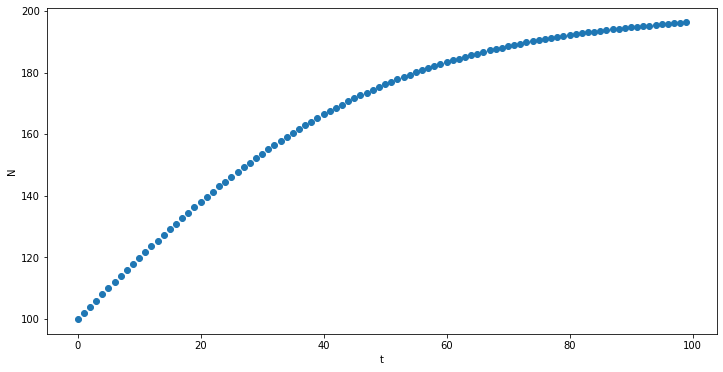

In [7]:
t = np.linspace(0, 99, 100)
N0 = 100
r = 0.04
k = 200
N = k / (1 + np.power(np.e, -0.04*t))
plt.figure(figsize=(12, 6))
plt.scatter(t, N)
plt.xlabel('t')
plt.ylabel('N')

Text(0, 0.5, 'p3')

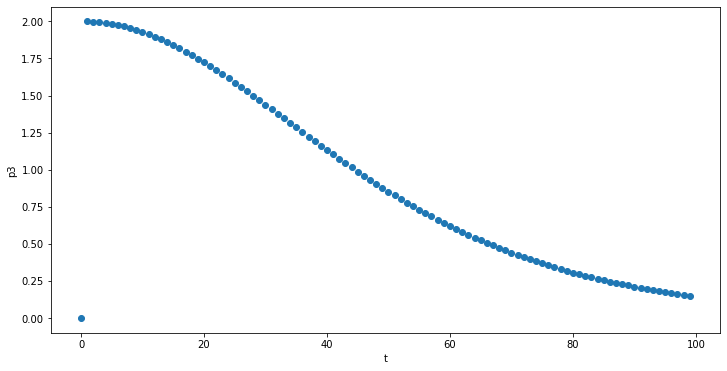

In [8]:
p3 = [N[i+1] - N[i] for i in range(len(N)-1)]
p3 = np.array([0] + p3)

plt.figure(figsize=(12, 6))
plt.scatter(t, p3)
plt.xlabel('t')
plt.ylabel('p3')

#### Sigmoid function

Defining $x=N/k$, we can ger $$x = \frac{e^{rt}}{e^{rt} + c}$$
When $r = 1, x_0 = 1/2$, It equals to $$x(t) = \frac{e^t}{e^t + 1}$$

Text(0, 0.5, 'x(t)')

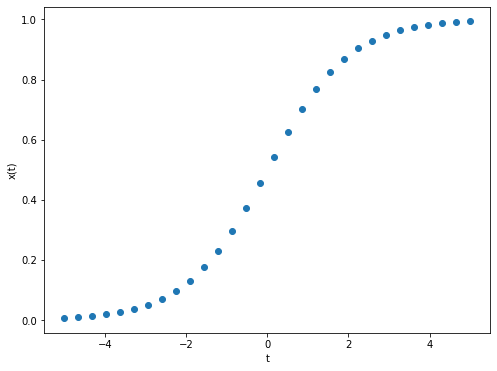

In [9]:
t = np.linspace(-5, 5, 30)
# print(t)
x = np.power(np.e, t) / (1 + np.power(np.e, t))
plt.figure(figsize=(8, 6))
plt.scatter(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')

#### Bacterial growth curve (from wiki)

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c0/Bacterial_growth_en.svg">

### 4. the Generalized Lotka-Volterra model
- 广义LV模型
- ref: https://stefanoallesina.github.io/Sao_Paulo_School/intro.html

#### 4.1 A single population

$$\frac{d_{N}}{d_t} = N (r + a N)$$

Same as the Verhulst Equation.

#### 4.2 Multi-species

$$\frac{d_{x(t)}}{d_t} = D(x(t))(r + Ax(t))$$

where $x(t)$ is a (column) vector of length $n$ containing the densities of all populations $1,…,n$ at time $t$, 

$r$ is a vector of “intrinsic growth rates” (or death rates, when negative), measuring the growth (decline) of population $i$ when grown alone at low density, 

and $A$ is a $n\times n$ matrix of interaction coefficients. 

We use $D(x)$ to denote the diagonal matrix with $x$ on the diagonal.